## Data Science Workshop

*Prepared by:*
**Jude Michael Teves** and **Unisse Chua**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sns.set_style('darkgrid')

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data

In the cell below, we will be loading the Titanic dataset, a popular toy dataset.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class. Can be used as proxy for socio-economic status|1 = Upper, 2 = Middle, 3 = Lower|
|Sex|Sex||	
|Age|Age in years||	
|Sibsp|# of siblings / spouses aboard the Titanic||
|Parch|	# of parents / children aboard the Titanic||	
|Ticket|Ticket number||
|Fare|Passenger fare||	
|Cabin|Cabin number||	
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|



Notes:

- Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- Sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

- Parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

## Exploratory Data Analysis

Like most data science projects, we perform EDA so that we better understand the data we are dealing with.

### Class Distribution

We visualize the class distribution in the cell below. The dominant passenger class is the lower class.

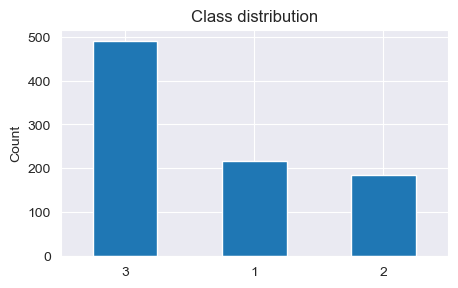

In [3]:
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=100)
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Class distribution')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

### Sex Distribution

There are more male passengers.

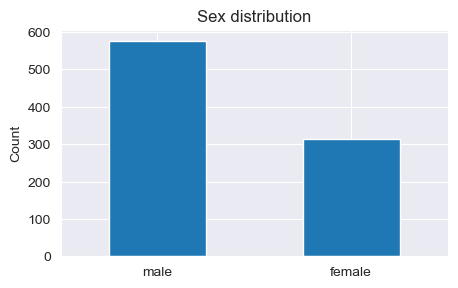

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=100)
df['Sex'].value_counts().plot(kind='bar')
plt.title('Sex distribution')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

but more female passengers survived...

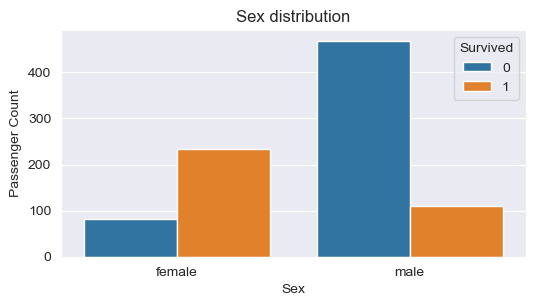

In [44]:
fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=100)

sns.barplot(
    data=df[['Survived','Sex','Pclass']].rename({'Pclass':'Passenger Count'}, axis=1).groupby(['Survived','Sex']).count().reset_index(), 
    x="Sex", y="Passenger Count", hue="Survived", ax=ax
)
plt.title('Sex distribution')
plt.show()

### Fare Distribution

The fare distribution is skewed to the right--most passenger have low fares.

Max Fare: 512.3292 | Min Fare: 0.0


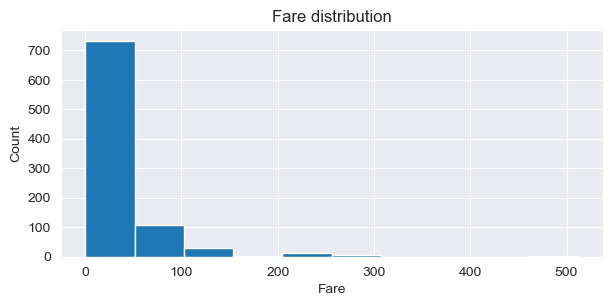

In [45]:
print(f"Max Fare: {df.Fare.max()} | Min Fare: {df.Fare.min()}")
fig, ax = plt.subplots(1,1, figsize=(7,3), dpi=100)
df['Fare'].hist()
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

### Exercise 1. Title Distribution

We will be extracting the titles of the passengers and visualize them. Time to practice your Python skills! Implement a function that extracts the title given a name.

In [69]:
def get_title(name:str) -> str:
    '''
    Extracts the title given a name.
    
    Parameters
    ----------
    name : str
        The passenger's name.
        
    Returns
    ----------
    str
        The title of the passenger extracted from the name.
    '''
    
    title = name.split(", ")[1].split()[0]
    return title

In [70]:
sample_name = "Braund, Mr. Owen Harris" 
get_title(sample_name) # this should return Mr.

'Mr.'

In [71]:
sample_name = "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
get_title(sample_name) # this should return Mrs.

'Mrs.'

In [72]:
sample_name = "Heikkinen, Miss. Laina"
get_title(sample_name) # this should return Miss.

'Miss.'

In [73]:
# run the code below once you have implemented the `get_title` function
title_counts = df['Name'].apply(get_title).value_counts()
title_counts

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Lady.          1
the            1
Jonkheer.      1
Sir.           1
Don.           1
Capt.          1
Mme.           1
Ms.            1
Name: Name, dtype: int64

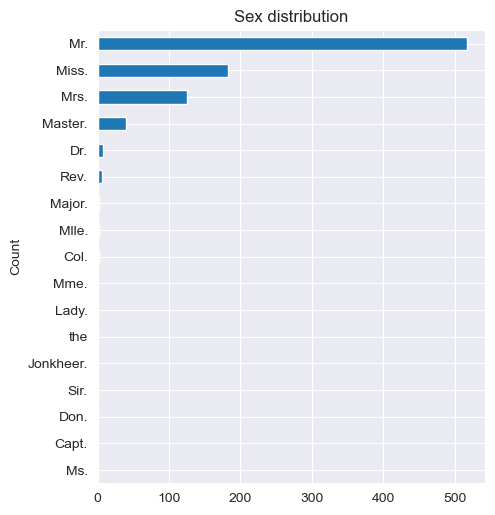

In [74]:
fig, ax = plt.subplots(1,1, figsize=(5,6), dpi=100)
title_counts.sort_values(ascending=True).plot(kind='barh')
plt.title('Sex distribution')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

## Machine Learning

Let's make this more fun! Let's use Machine Learning to predict if a passenger will survive. For now, we will only be using the `Pclass`, `Sex`, and `Fare` features to make things simple.

## Data Preparation

In Machine Learning, `X` and `y` are usually the variable names for the input and output data respectively.

In [96]:
X = df[['Pclass', 'Sex', 'Fare']]
X = pd.get_dummies(X)
y = df['Survived']

In [97]:
pd.concat([X, y.to_frame()], axis=1)

,Pclass,Fare,Sex_female,Sex_male,Survived
0,3,7.2500,0,1,0
1,1,71.2833,1,0,1
2,3,7.9250,1,0,1
3,1,53.1000,1,0,1
4,3,8.0500,0,1,0
...,...,...,...,...,...
886,2,13.0000,0,1,0
887,1,30.0000,1,0,1
888,3,23.4500,1,0,0
889,1,30.0000,0,1,1


## Modeling

We will now be training our own Machine Learning model. I have already provided the function for training a Machine Learning model below.

In [77]:
def train_model(X:pd.DataFrame, y:pd.DataFrame):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=-1) # instantiate model
    model.fit(X_train, y_train) # train the model
    print(f"Train Set Score: {model.score(X_train, y_train)}")
    print(f"Test Set Score: {model.score(X_test, y_test)}")
    
    return model

### Exercise 2: Implement ML model's predict function 

In [78]:
def predict(model, pclass, fare, sex) -> str:
    # if sex is male, sex_male = 1 and sex_female = 0
    # if sex is female, sex_male = 0 and sex_female = 1
    # if not male or female, return an error message
    # your code here...
    survived = model.predict([[pclass, fare, sex_female, sex_male]])[0]
    
    # return "person will survive" if survived is 1, else return "person will not survive"
    # your code here...

In [100]:
model = train_model(X, y)
predict(model, 3, 50, 'female') # this should return 'person will survive'

Train Set Score: 0.8623595505617978
Test Set Score: 0.7821229050279329


'person will survive'

In [101]:
predict(model, 3, 50, 'male') # this should return 'person will not survive'

'person will not survive'

In [102]:
predict(model, 3, 50, 'none') # this should return an error message

'Invalid input'

In [99]:
def predict(model, pclass, fare, sex) -> str:
    # if sex is male, sex_male = 1 and sex_female = 0
    # if sex is female, sex_male = 0 and sex_female = 1
    # if not male or female, return an error message
    # your code here...
    if sex == 'male':
        sex_male = 1
        sex_female = 0
    elif sex == 'female':
        sex_male = 0
        sex_female = 1
    else:
        return "Invalid input"
    
    survived = model.predict([[pclass, fare, sex_female, sex_male]])[0]
    
    # return "person will survive" if survived is 1, else return "person will not survive"
    # your code here...
    if survived==1:
        return "person will survive"
    else:
        return "person will not survive"
    
model = train_model(X, y)

# predict(model, 3, 50, 'male')
predict(model, 3, 50, 'female')

Train Set Score: 0.8623595505617978
Test Set Score: 0.7821229050279329


'person will survive'

### Exercise 3: Ask for user's input and integrate with the ML predict function

In [ ]:
# your code here...
# call train_model function and provide the necessary arguments and store the model in a variable named `model`

iterations = int(input('Iterations'))
# ask for the user's input `x` times where `x` is the number assigned in iterations variable.
# Python's built-in `range` function might come in handy
# each time you ask ask for user's input, get the pclass, fare, and sex
# you might have to type-cast some of the values
# call the predict function pass the necessary arguments
# print the value return by predict function

In [103]:
# your code here...
model = train_model(X, y)

iterations = int(input('Iterations'))
# ask for the user's input `x` times where `x` is the number assigned in iterations variable
# Hint: Python's built-in `range` function might come in handy
# each time you ask ask for user's input, get the pclass, fare, and sex
# you might have to type-cast some of the values. 
# Hint: Take note of the following data types. pclass - int, fare - float, sex- str
# call the predict function pass the necessary arguments
# print the value return by predict function
for i in range(iterations):
    pclass = int(input("Pclass: "))
    fare = float(input("Fare: "))    
    sex = input("Sex: ")    
    output = predict(model, pclass, fare, sex)
    print(output)

Train Set Score: 0.8623595505617978
Test Set Score: 0.7821229050279329


Iterations 1
Pclass:  1
Fare:  500
Sex:  female


person will survive


## End
<sup>made by **Jude Michael Teves** and **Unisse Chua**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup> <sup>judemichaelteves@gmail.com or jude.teves@dlsu.edu.ph or unisse.chua@dlsu.edu.ph</sup><br>
